In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime, timedelta
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [2]:
df = pd.read_csv("us-counties.csv")

df['date'] = pd.to_datetime(df['date'])

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [3]:
df_total = df.groupby(['county'], as_index = False).max()
topcounties = df_total.sort_values(by='cases', ascending=False).head(10)
print(topcounties)

              county       date       state     fips    cases   deaths
1032     Los Angeles 2021-10-03  California   6037.0  1463743  26153.0
1226   New York City 2021-10-03    New York      NaN  1085590  34284.0
1074        Maricopa 2021-10-03     Arizona   4013.0   700319  11558.0
1140      Miami-Dade 2021-10-03     Florida  12086.0   661638   8504.0
414             Cook 2021-10-03   Minnesota  27031.0   620602  11603.0
761           Harris 2021-10-03       Texas  48201.0   558618   8414.0
464           Dallas 2021-10-03       Texas  48113.0   389318   4931.0
1516       San Diego 2021-10-03  California   6073.0   373289   4078.0
1466       Riverside 2021-10-03  California   6065.0   363950   5004.0
1515  San Bernardino 2021-10-03  California   6071.0   351963   5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [4]:
df_total2 = df.groupby(['state']).max()
df_total2.sort_values(by='cases', ascending=False).head(5)

,date,county,fips,cases,deaths
state,,,,,
California,2021-10-03,Yuba,6115.0,1463743,26153.0
New York,2021-10-03,Yates,36123.0,1085590,34284.0
Arizona,2021-10-03,Yuma,4027.0,700319,11558.0
Florida,2021-10-03,Washington,12133.0,661638,11799.0
Illinois,2021-10-03,Woodford,17203.0,620602,11603.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [5]:
df2 = df[(df['county'].isin(topcounties['county'])) & (df['state'].isin(topcounties['state']))]
df2 = df2.drop(['fips', 'state', 'deaths'], axis=1)
df2 = df2.set_index(['county','date'])

In [6]:
def calc_incidence_index(row, df):
    prev_index = (row.name[0], row.name[1] - timedelta(1))
    if prev_index in df.index: 
        return df.loc[prev_index]['cases']# row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0
    
df2['incidence_ind'] = df2.apply(lambda x: calc_incidence_index(x, df2),axis=1)
df2.head(10)

,,cases,incidence_ind
county,date,,
Maricopa,2020-01-26,1,0
Los Angeles,2020-01-26,1,0
Maricopa,2020-01-27,1,1
Los Angeles,2020-01-27,1,1
Maricopa,2020-01-28,1,1
Los Angeles,2020-01-28,1,1
Maricopa,2020-01-29,1,1
Los Angeles,2020-01-29,1,1
Maricopa,2020-01-30,1,1


#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [7]:
df3 = df2.groupby(['county'])['incidence_ind'].max()
print(df3)

county
Cook                  220
Dallas             389318
Harris             558282
Los Angeles       1462717
Maricopa           698680
Miami-Dade         661638
New York City     1085590
Riverside          363950
San Bernardino     351963
San Diego          373289
Name: incidence_ind, dtype: int64


#### Question 5: Plot an incidence curve for the County with the highest peak.

<AxesSubplot:xlabel='date'>

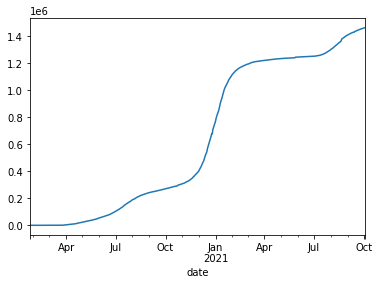

In [8]:
df2.loc['Los Angeles']['incidence_ind'].plot()

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

<AxesSubplot:xlabel='county'>

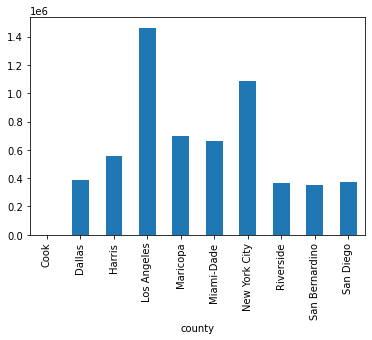

In [9]:
df3.plot.bar()